# HK Model (unmodified)

## $d=1$

### 1. Density

In [2]:
from HKLnumerics import HK_1D, PlotFunctions

In [138]:
mu_U1 = HK_1D.create_mu_array(1000, 2)
mu_U8 = HK_1D.create_mu_array(1000, 8)

rho_U1 = HK_1D.create_rho_array(mu_U1, 2)
rho_U8 = HK_1D.create_rho_array(mu_U8, 8)

mus = [mu_U1, mu_U8]
rhos = [rho_U1, rho_U8]
labels = [r'$U=W/2$', r'$U=2W$']

Progress: 99.9%                    

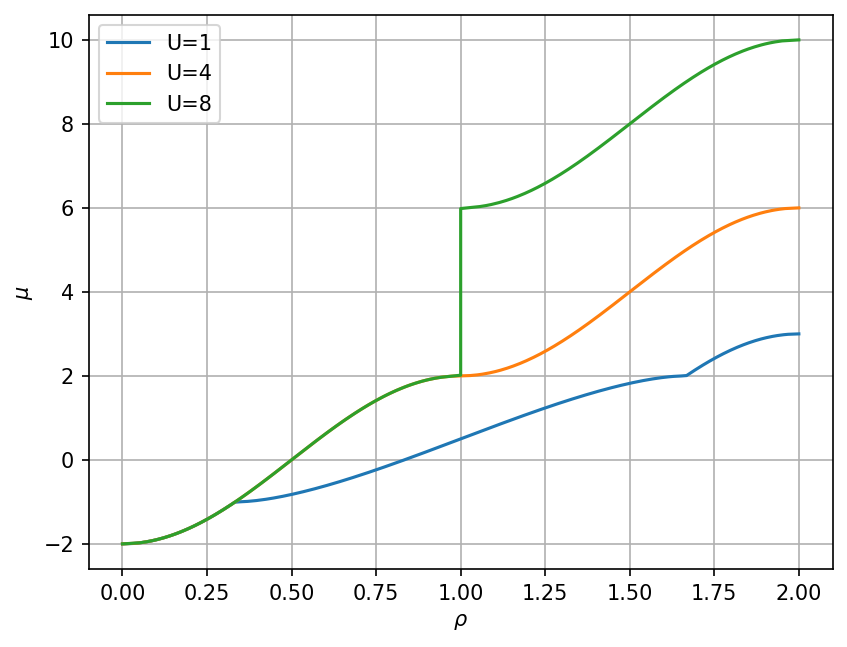

In [5]:
PlotFunctions.many_plots(labels, rhos, mus, r'$\rho$', r'$\mu$')

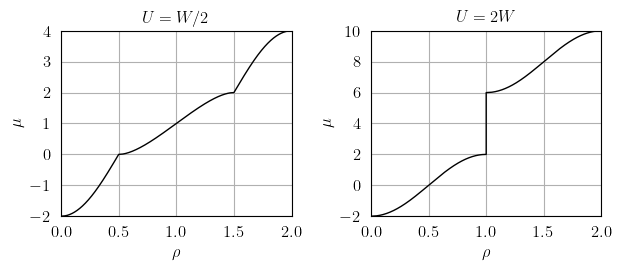

In [141]:
PlotFunctions.thesis_doubleplot_one_line(rhos, mus, r'$\rho$', r'$\mu$', labels, yticks=[1, 2], save_title='Plots/HK_mu_rho_weak_strong.pdf')

Maybe continue with more values for density, plot them a t same time?

#### 3d-Plot

In [40]:
import numpy as np
import matplotlib.pyplot as plt

N = 200
U_vals = np.linspace(0, 8, N)

# build mu_grid: row i contains mu values for U = U_vals[i]
mu_grid = np.empty((N, N))
for i, U in enumerate(U_vals):
    mu_grid[i, :] = np.linspace(-2, 2 + U, N)

# build rho_grid: each row is the rho array computed for that row's mu and U
rho_grid = np.empty_like(mu_grid)
for i, U in enumerate(U_vals):
    rho_grid[i, :] = HK_1D.create_rho_array(mu_grid[i, :], U)   # shape (N,)

rho_grid_Uc = np.empty_like(rho_grid)
for i, U in enumerate(U_vals):
    for j in range(N):
        if U < 4 * np.square(np.sin(np.pi * rho_grid[i, j] / 2)):
            rho_grid_Uc[i, j] = rho_grid[i, j]
        else:
            rho_grid_Uc[i, j] = np.nan
    

# build U_grid as a 2D array where each row is the constant U value
U_grid = np.repeat(U_vals[:, None], N, axis=1)   # shape (N, N)

# (Optional) mask invalid values if create_rho_array may produce NaNs
rho_grid = np.ma.masked_invalid(rho_grid)



Progress: 99.5%                    

In [41]:
rho_grid_Uc = np.empty_like(rho_grid)
for i, U in enumerate(U_vals):
    for j in range(N):
        if U <= 4 * np.square(np.sin(np.pi * rho_grid[i, j] / 2)):
            rho_grid_Uc[i, j] = rho_grid[i, j]
        else:
            rho_grid_Uc[i, j] = np.nan

In [42]:
mask2 = (rho_grid > 1) | ~(np.isnan(rho_grid_Uc))
mask3 = (rho_grid < 1) | ~(np.isnan(rho_grid_Uc))
mask4 = (rho_grid != 1) | ~(np.isnan(rho_grid_Uc))
mask1 = ~(mask2 & mask3 & mask4)


In [43]:
for i, U in enumerate(U_vals):
    if i < N-1:
        for j in range(N-1):
            if U <= 4 * np.square(np.sin(np.pi * rho_grid[i, j] / 2)):
                rho_grid_Uc[i+1, j+1] = rho_grid[i+1, j+1]
            else:
                rho_grid_Uc[i+1, j+1] = np.nan

In [36]:
print(rho_grid_Uc)

[[0.0 0.128181804137516 0.1815853234795357 ... 1.8184146765204647
  1.8718181958624842 2.0]
 [nan nan 0.10457338718100762 ... 1.8954266128189943 nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


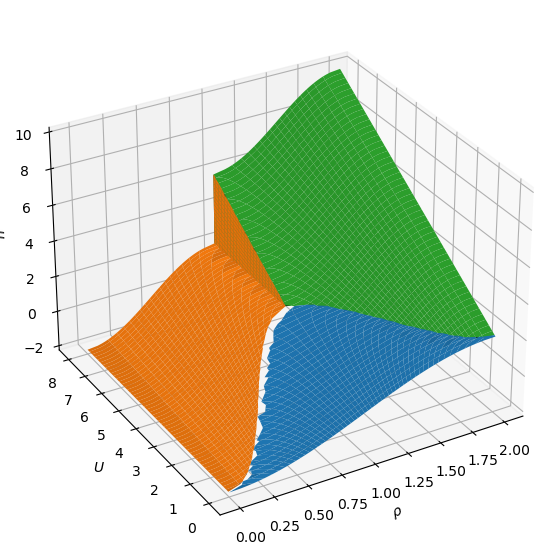

In [44]:
# --- Plot ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

#ax.plot_surface(rho_grid, U_grid, mu_grid, edgecolor='none', shade=True, zorder=1)

ax.plot_surface(
    rho_grid_Uc,
    U_grid,
    mu_grid,
    edgecolor='none', shade=True, zorder=1, antialiased=True
)

ax.plot_surface(
    np.ma.array(rho_grid, mask=mask2),
    np.ma.array(U_grid, mask=mask2),
    np.ma.array(mu_grid, mask=mask2),
    edgecolor='none', shade=True, zorder=2
)

ax.plot_surface(
    np.ma.array(rho_grid, mask=mask3),
    np.ma.array(U_grid, mask=mask3),
    np.ma.array(mu_grid, mask=mask3),
    edgecolor='none', shade=True, zorder=3
)

ax.plot_surface(
    np.ma.array(rho_grid, mask=mask4),
    np.ma.array(U_grid, mask=mask4),
    np.ma.array(mu_grid, mask=mask4),
    edgecolor='none', shade=True, zorder=4
)



ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$U$')
ax.set_zlabel(r'$\mu$')

ax.view_init(elev=30, azim=240)   # adjust viewing angle as desired
plt.show()

phase2 points: 356107
phase3 points: 356106
phase4 points: 94516


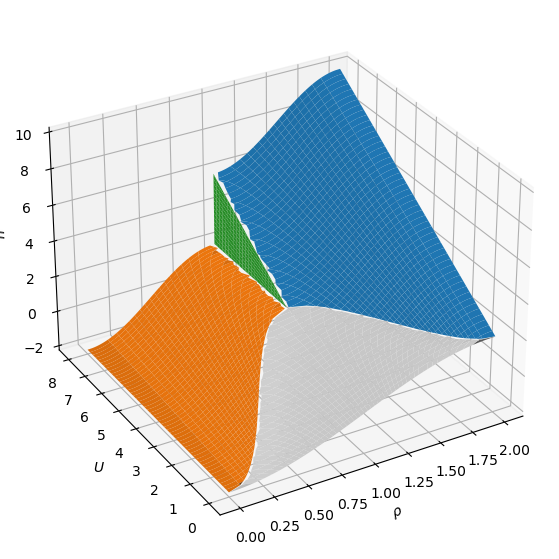

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# --- compute 'valid' region where rho_grid_Uc is NaN (your interesting points) ---
valid = np.isnan(rho_grid_Uc)            # True where you want to classify phases

# --- define phase booleans (visible where True) ---
phase2 = valid & (rho_grid < 1)                  # rho < 1
phase3 = valid & (rho_grid > 1)                  # rho > 1
phase4 = valid & np.isclose(rho_grid, 1, atol=1e-8)  # rho == 1 (use isclose)

# debug counts
print("phase2 points:", phase2.sum())
print("phase3 points:", phase3.sum())
print("phase4 points:", phase4.sum())

# --- masks for plotting (mask=True means "hide this point") ---
mask_phase2 = ~phase2   # hide everything except phase2
mask_phase3 = ~phase3
mask_phase4 = ~phase4

# mask the base where any phase exists (we WANT to hide the base there)
mask_base = phase2 | phase3 | phase4   # True where a phase will sit -> hide base

# --- Plot ---
fig = plt.figure(figsize=(10, 7))
ax  = fig.add_subplot(111, projection='3d')

# base (only shown where no phase exists)
ax.plot_surface(
    np.ma.array(rho_grid, mask=mask_base),
    np.ma.array(U_grid,   mask=mask_base),
    np.ma.array(mu_grid,  mask=mask_base),
    color='lightgray',
    linewidth=0,
    antialiased=True,
    shade=True
)

# phase 2
ax.plot_surface(
    np.ma.array(rho_grid, mask=mask_phase2),
    np.ma.array(U_grid,   mask=mask_phase2),
    np.ma.array(mu_grid,  mask=mask_phase2),
    color='tab:orange',
    linewidth=0,
    antialiased=True,
    shade=True
)

# phase 3
ax.plot_surface(
    np.ma.array(rho_grid, mask=mask_phase3),
    np.ma.array(U_grid,   mask=mask_phase3),
    np.ma.array(mu_grid,  mask=mask_phase3),
    color='tab:blue',
    linewidth=0,
    antialiased=True,
    shade=True
)

# (optional) phase 4
ax.plot_surface(
    np.ma.array(rho_grid, mask=mask_phase4),
    np.ma.array(U_grid,   mask=mask_phase4),
    np.ma.array(mu_grid,  mask=mask_phase4),
    color='tab:green',
    linewidth=0,
    antialiased=True,
    shade=True
)

ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$U$')
ax.set_zlabel(r'$\mu$')
ax.view_init(elev=30, azim=240)
plt.show()


Idea: I know curve of U_c in U-rho-plane. It should be bossible and not so hard to color mu values according to the phase, thereby highlighting phase transitions clearly.

### 2. Compressibility

In [11]:
kappa_U1 = HK_1D.create_kappa_array(mu_U1, 1)
kappa_U4 = HK_1D.create_kappa_array(mu_U4, 4)
kappa_U8 = HK_1D.create_kappa_array(mu_U8, 8)

kappas = [kappa_U1, kappa_U4, kappa_U8]

Progress: 99.9%                    

In [ ]:
PlotFunctions.one_plot(rho_U1, kappa_U1, r'$\rho$', r'$\kappa$')
PlotFunctions.one_plot(rho_U4, kappa_U4, r'$\rho$', r'$\kappa$')
PlotFunctions.one_plot(rho_U8, kappa_U8, r'$\rho$', r'$\kappa$')

### 3. Energy

In [17]:
energy_U1 = HK_1D.create_energy_array(mu_U1, 1)
energy_U4 = HK_1D.create_energy_array(mu_U4, 4)
energy_U8 = HK_1D.create_energy_array(mu_U8, 8)

energies = [energy_U1, energy_U4, energy_U8]

Progress: 99.9%                    

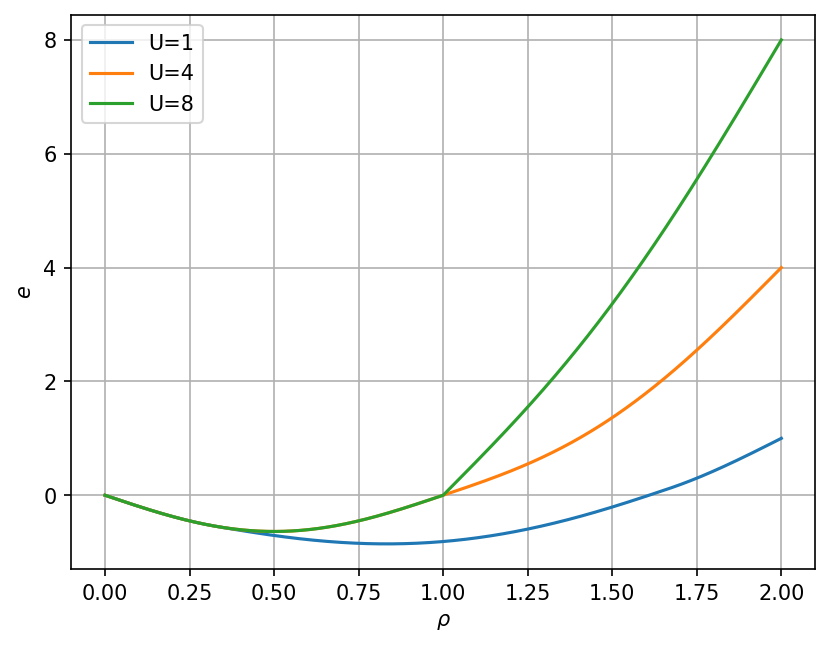

In [18]:
PlotFunctions.many_plots(labels, rhos, energies, r'$\rho$', r'$e$')

### Phase Diagram

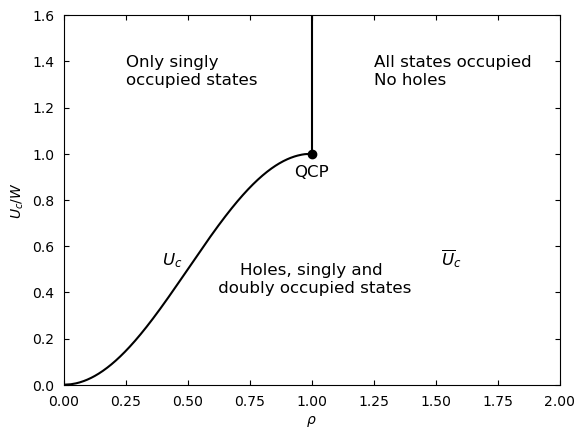

In [ ]:
from HKLnumerics import PhaseDiagram_1D
import numpy as np

rho_arr, Uc_arr = PhaseDiagram_1D.phase_diagram_hk(500)

Uc_arr_norm = Uc_arr / np.max(Uc_arr)

PlotFunctions.plot_phase_diagram(rho_arr, Uc_arr_norm, r'$\rho$', r'$U_c/W$', 1.6)

## $d=2$

In [45]:
from HKLnumerics import HK_2D, PlotFunctions
import numpy as np

str_rho = r'$\rho$'
str_mu = r'$\mu$'

N = 100

In [46]:
U_list_2d = [2, 4, 8, 12]
labels_2d = [r'$W/4$', r'$W/2$', r'$W$', r'$3W/2$']
mu_list_2d = [HK_2D.create_mu_array(N, U_i) for U_i in U_list_2d]
rho_list_2d = [HK_2D.create_rho_array(mu_list_2d[i], U_list_2d[i]) for i in range(4)]

Progress: 99.0%                    

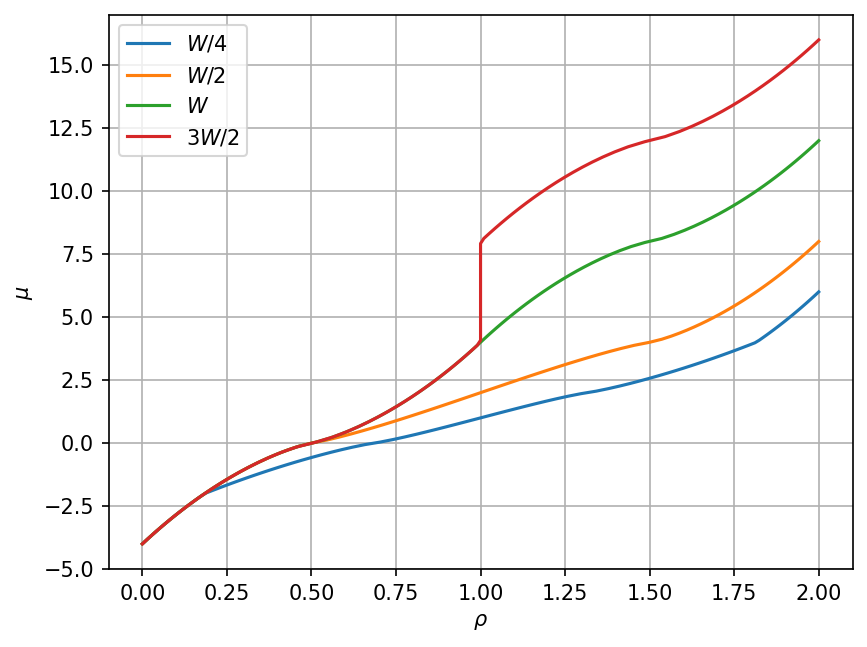

In [47]:
PlotFunctions.many_plots(labels_2d, rho_list_2d, mu_list_2d, str_rho, str_mu)

## $d=3$

In [48]:
from HKLnumerics import HK_3D

U_list_3d = [3, 6, 12, 18]
labels_3d = [r'$W/4$', r'$W/2$', r'$W$', r'$3W/2$']
mu_list_3d = [HK_3D.create_mu_array(N, U_i) for U_i in U_list_3d]
rho_list_3d = [HK_3D.create_rho_array(mu_list_3d[i], U_list_3d[i]) for i in range(4)]

Progress: 27.0%                    

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 29.0%                    

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 99.0%                    

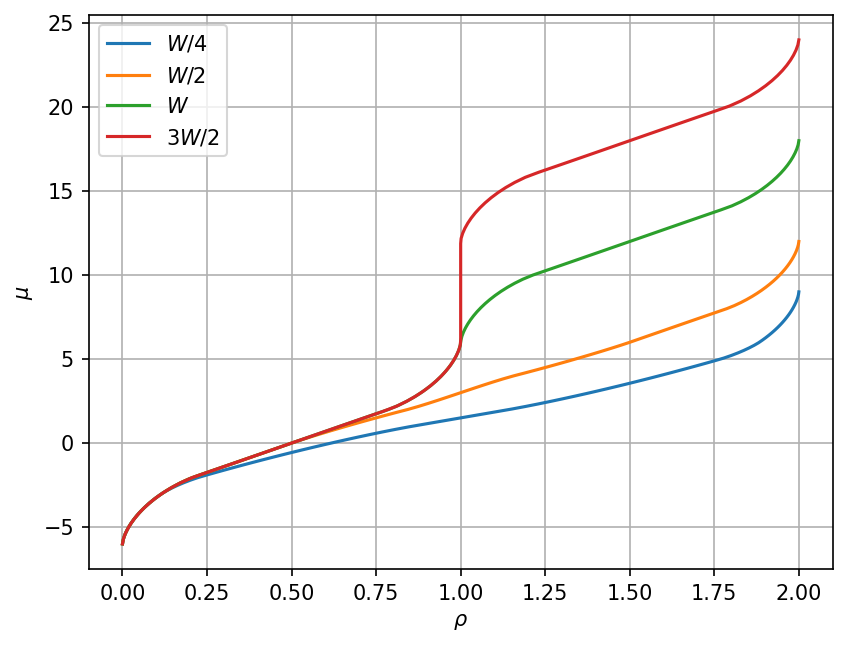

In [49]:
PlotFunctions.many_plots(labels_2d, rho_list_3d, mu_list_3d, str_rho, str_mu)

In [56]:
print(rho_list_3d)

[array([0.00000000e+00, 1.00742872e-03, 2.88294128e-03, 5.35980491e-03,
       8.35292073e-03, 1.18193942e-02, 1.57353206e-02, 2.00875835e-02,
       2.48701476e-02, 3.00821569e-02, 3.57268986e-02, 4.18112415e-02,
       4.83453717e-02, 5.53427360e-02, 6.28201591e-02, 7.07981231e-02,
       7.93012323e-02, 8.83589005e-02, 9.80063487e-02, 1.08286050e-01,
       1.19339156e-01, 1.32289761e-01, 1.46840151e-01, 1.62910698e-01,
       1.80585517e-01, 2.00077249e-01, 2.21881819e-01, 2.47485167e-01,
       2.74226751e-01, 3.01356153e-01, 3.28881508e-01, 3.56814330e-01,
       3.85169299e-01, 4.13964254e-01, 4.43220374e-01, 4.72962481e-01,
       5.03219583e-01, 5.34025612e-01, 5.65420521e-01, 5.97451837e-01,
       6.30177024e-01, 6.63667102e-01, 6.98012677e-01, 7.33334807e-01,
       7.69807466e-01, 8.07715484e-01, 8.47707968e-01, 8.91049006e-01,
       9.34637292e-01, 9.78213746e-01, 1.02178626e+00, 1.06536271e+00,
       1.10895099e+00, 1.15229203e+00, 1.19228452e+00, 1.23019254e+00,
     

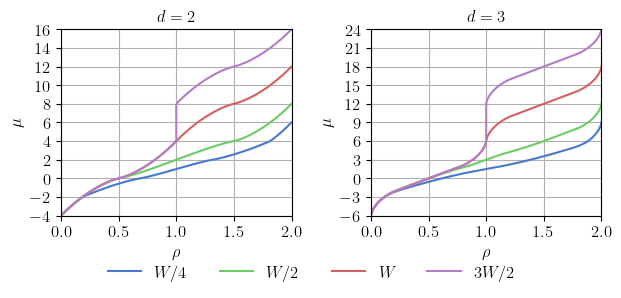

In [68]:
import importlib
importlib.reload(PlotFunctions)

PlotFunctions.thesis_doubleplot_multiple_lines([labels_2d, labels_3d], [rho_list_2d, rho_list_3d], [mu_list_2d, mu_list_3d],
                                               str_rho, str_mu, [r'$d=2$', r'$d=3$'], yticks=[2, 3], save_title='Plots/HK_mu_rho_2d3d.pdf')